# Изучение рынка заведений общественного питания Москвы

- Автор: Столярова Оксана
- Дата: 25.01.2025

### Цели и задачи проекта

**Цель:** провести исследовательский анализ рынка общественного питания Москвы с опредением наиболее перспективного формата заведения для инвестирования.

**Задачи:**
1. Загрузить данные и познакомиться с их содеражанием.
2. Подготовить данные к исследовательскому анализу.
3. Провести исследовательский анализ исходных данных и ответьте на вопросы:
- изучить представленность категорий заведений общественного питания по каждой категории,
- определить распределение количества заведений по административным районам Москвы  с акцентом на Центральном административном округе Москвы, 
- изучить соотношение сетевых и несетевых заведений в целом и в разрезе категорий,
- исследовать количество посадочных мест в заведениях,
- изучить рейтинг заведений,
- определить какие параметры больше всего влияют на  рейтинги заведений,
- выделить топ-15 популярных сетей в Москве,
- изучить вариацию среднего чека заведений в зависимости от района Москвы. 
4. Сформулировать выводы и рекомендации по проведённому анализу.

### Описание данных

Для анализа доступны данные датасетов:
- rest_info.csv содержит информацию о заведениях общественного питания;
- rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания.

<a id=intro></a>
### Содержимое проекта

1. [Загрузка данных и знакомство с ними](#1)
2. [Предобработка данных](#2)
3. [Исследовательский анализ данных](#3)
4. [Итоговый вывод и рекомендации](#4)
---

## 1. Загрузка данных и знакомство с ними<a id='1'></a>

Загрузим необходимые библиотеки и датасеты `rest_info` и `rest_price`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `rest_info_df` и `rest_price_df`.


In [1]:
!pip install phik

In [2]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

In [3]:
# Выгружаем данные в переменные rest_info_df и rest_price_df
rest_info_df = pd.read_csv('/datasets/rest_info.csv')
rest_price_df = pd.read_csv('/datasets/rest_price.csv')

Сначала познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [4]:
# Выводим первые строки датафрейма на экран
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим информацию о датафрейме
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информацияо заведениях общественного питания Москвы.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов имеют корректный формат snake case.
- Первые пять столбцов  `id`, `name`, `address`, `district`, `category`, `hours` имеют тип данных `object`. Столбец `chain` представлен типом `int64`, его размерность можно оптимизировать. Столбцы `rating` и `seats` представлены типом `float64`. Для 'rating' этот тип корректный, для 'seats' оптимальным будет целочисленный тип, но для преобразования сначала необходимо будет избавиться от пропусков.
- Пропуски содержатся только в столбцах `hours` и `seats`, остальные столбцы необходимо будет проверить на значения-индикаторы, которые по сути тоже будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `rest_price.csv` с помощью тех же методов:

In [6]:
# Выводим первые строки датафрейма на экран
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания​ Москвы.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов имеют корректный формат snake case.
- Первые три столбца  'id', 'price', 'avg_bill'  имеют тип данных 'object'. Столбцы 'middle_avg_bill', 'middle_coffee_cup' представлены типом 'float64'. Типы данных корректны.
- Пропуски содержатся во всех столбцах, кроме 'id'.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

---

### Промежуточный вывод

Первичное знакомство показывает, что данные соответствуют описанию и выглядят корректными, названия столбцов в нужном формате. В данных присутствуют пропущенные значения, которые необходимо будет обработать. Кроме того, во втором датасете количество строк значительно меньше, а это значит, что при объединении таблиц, появятся дополнительные пропуски.
Типы данных в части столбцов желательно оптимизировать.

### Подготовка единого датафрейма

Для достижения цели проекта необходимы данные из двух датасетов, поэтому их  данные можно объединить в один. Так нам проще будет искать закономерности в данных и определять формат наиболее перспективного для открытия заведения. 

In [8]:
# Соединяем данные в единый датафрейм df
df = rest_info_df.merge(rest_price_df, how='left', on='id')
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Данные соединены, и информация обо всех заведениях сохранилась.

[*К содержанию*](#intro) 

## 2. Предобработка данных<a id='2'></a>

Проведем оптимизацию типов данных. На предыдущем шаге, мы выяснили, что можно провести оптимизацию целочисленных данных в столбце 'chain'. Для оптимизации будем использовать метод pd.to_numeric с аргументом downcast='integer'.

In [9]:
# Оптимизируем целочисленный тип данных в столбце 'chain':
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')

In [10]:
# Проверим типы данных в датафрейме bank_df с помощью атрибута dtypes
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

Столбцы  'seats', 'middle_avg_bill', 'middle_coffee_cup' представлены типом 'float64'. Для них оптимальным будет целочисленный тип, это преобразование можно будет сделать после обработки пропуков, т.к. именно они скорее всего были причинной этого типа данных.

При первичном анализе мы обнаружили пропуски в нескольких столбцах. Узнаем их абсолютное и относительное количество пропусков в датафрейме.

In [11]:
# Применяем метод isna() к датафрейму df
df.isna().sum().sort_values()

id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
hours                 536
seats                3611
avg_bill             4590
price                5091
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [12]:
# Подсчитываем долю строк с пропусками
(df.isna().sum() / df.shape[0]).sort_values()

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
rating               0.000000
chain                0.000000
hours                0.063764
seats                0.429574
avg_bill             0.546039
price                0.605639
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

Пропуски присутствуют в столбцах 'hours', 'seats', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup' и их процент выше 5%. Значит удалив их, мы потерям огромное количество данных.

Пропуски в значениях большинства столбцов скорее всего вызваны отсутствием данных, т.к. они были взяты с сервисов Яндекс Карты и Яндекс Бизнес, где информация могла быть добавлена как пользователями, так и найдена в общедоступных источниках. Больше всего пропусков  в столбце 'middle_coffee_cup', что очевидно связано с типом заведения, т.к. этот показатель свойственен как правило кофейням. Это можно будет проверить при дальнейшем анализе.

Таким образом, пропущенные значения в столбцах корректнее всего будет заменить на значения-индикаторы. Для столбцов с типом данных object используем индикатор  "нет данных". Для числовых данных, необходимо убедиться, что они не повлияют на рузультат. Так как указанные столбцы предполагают положительный цифры, проверим их на минимальные значения и в случае подтверждения нашего предположения поставим индикатор '-1'.

In [13]:
for col in  ['seats', 'middle_avg_bill', 'middle_coffee_cup']:
    print(f'Минимальное значение в столбце {col}: {df[col].min()}')

Минимальное значение в столбце seats: 0.0
Минимальное значение в столбце middle_avg_bill: 0.0
Минимальное значение в столбце middle_coffee_cup: 60.0


Так как все значения в указанных столбцах оказались неотрицательными числами, можен провести замену пропусков на индикатор '-1'.

In [14]:
#Заменим пропуски в столбцах с числовым типом данных на индикатор '-1', 
#чтобы он не мог быть использован при расчете данных:
for col in ['seats', 'middle_avg_bill', 'middle_coffee_cup']:
    df[col] = df[col].fillna(-1)
#Пропуски в столбцах с типом данных object заменим на индикатор "нет данных":
for col in ['hours', 'price', 'avg_bill']:
    df[col] = df[col].fillna('нет данных')

Теперь, когда пропуски обработаны, можем привести столбец 'seats' к целочисленному типу:

In [15]:
# Оптимизируем целочисленный тип данных в столбцах 'seats', 'middle_avg_bill', 'middle_coffee_cup':
for col in ['seats', 'middle_avg_bill', 'middle_coffee_cup']:
    df[col] = pd.to_numeric(df[col], downcast='integer')

Проверим корректность проведенных преобразований:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int8   
 8   seats              8406 non-null   int16  
 9   price              8406 non-null   object 
 10  avg_bill           8406 non-null   object 
 11  middle_avg_bill    8406 non-null   int32  
 12  middle_coffee_cup  8406 non-null   int16  
dtypes: float64(1), int16(2), int32(1), int8(1), object(8)
memory usage: 730.6+ KB


Пропуски удалены, типы данных оптимизированы, можем переходить к проверке данных на дубликаты.

Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов:

In [17]:
# Проверяем полные дубликаты в датафрейме df
df.duplicated().sum()

0

Полные дубликаты отсутствуют. Проверим наличие неявных дубликатов.
Значения по id заведений должны быть уникальными, начнем с их проверки.

In [18]:
#Проверяем дубликаты по столбцу 'id':
df.duplicated(subset='id').sum()

0

Дубликаты по id отсутствуют

В столбцах со строковым типом данных могут встречаться разные стили написания одних и тех же данных,  приведем эти значения (так как теоретически там тоже могут быть такие дубликаты) к единому регистру.

In [19]:
#Используем метод lower() и акцессор .str для приведения нужных столбцов к нижнему регистру и удаления лишних пробелов:
for col in ['name', 'address', 'district', 'category', 'hours', 'price', 'avg_bill']:
    df[col] = df[col].str.lower()
    df[col] = df[col].str.strip() 


In [20]:
#Теперь проверим столбцы с названием заведения и его адресом на дубликаты:
duplicates = df[df.duplicated(subset=['name', 'address'], keep=False)]
display(duplicates)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",северный административный округ,"ежедневно, 09:00–23:00",3.2,0,-1,нет данных,нет данных,-1,-1
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",северный административный округ,"ежедневно, 10:00–22:00",3.2,0,-1,нет данных,нет данных,-1,-1
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188,нет данных,нет данных,-1,-1
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188,нет данных,нет данных,-1,-1
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",северо-восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150,нет данных,нет данных,-1,-1
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",северо-восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150,нет данных,нет данных,-1,-1
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276,нет данных,нет данных,-1,-1
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",западный административный округ,нет данных,4.1,0,276,нет данных,нет данных,-1,-1


Сопоставив выведенные строки, можно сделать вывод о том, что эти значения являются дубликатами. Т.к. дубликатов немного, удалим строки с меньшим количеством данных по индексам.

In [21]:
#Удаляем строки с неявными дубликатами по известным нам теперь индексам:
df = df.drop(index=[215, 1430, 2211, 3109])
#Обновим индексы строк после удаления:
df = df.reset_index(drop=True)
#Проверяем отсутствие дубликатов:
df.duplicated(subset=['name', 'address']).sum()

0

Для дальнейшего анализа нам может понадобиться столбец, который будет показывать является ли заведение круглосуточным и работающим 7 дней в неделю. Назовем его 'is_24_7'. Если в строке есть данные о работе в режиме 24/7, то значение в новом столбце будет True, в противном случае - False. Затем можно использовать эти данные для изучения корреляции между рейтингом кафе и режимом его работы.
Данные о режиме работы содержаться в столбце 'hours'. 

In [22]:
#создаем новый столбец 'is_24_7' с булевыми значениями на основе данных в столбце' hours':
df['is_24_7'] = df['hours'].str.contains('круглосуточно', na=False) & df['hours'].str.contains('ежедневно', na=False)
#Приведем полученный столбцец к целочисленному типу
#и сразу оптимизируем его разрядность по аналогии с другими столбцами-индикаторами в таблице:
df['is_24_7'] = df['is_24_7'].astype(int)
df['is_24_7'] = pd.to_numeric(df['is_24_7'], downcast='integer')
#Выведем информацию о подготовленной к анализу таблице, чтобы проверить корректность проведенных изменений:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8402 entries, 0 to 8401
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              8402 non-null   object 
 6   rating             8402 non-null   float64
 7   chain              8402 non-null   int8   
 8   seats              8402 non-null   int16  
 9   price              8402 non-null   object 
 10  avg_bill           8402 non-null   object 
 11  middle_avg_bill    8402 non-null   int32  
 12  middle_coffee_cup  8402 non-null   int16  
 13  is_24_7            8402 non-null   int8   
dtypes: float64(1), int16(2), int32(1), int8(2), object(8)
memory usage: 672.9+ KB


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1,нет данных,нет данных,-1,-1,0
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,средний счёт:1500–1600 ₽,1550,-1,0
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,средний счёт:от 1000 ₽,1000,-1,0
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1,нет данных,цена чашки капучино:155–185 ₽,-1,170,0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,средний счёт:400–600 ₽,500,-1,0
5,8a343546b24e4a499ad96eb7d0797a8a,sergio pizza,пиццерия,"москва, ижорская улица, вл8б",северный административный округ,"ежедневно, 10:00–23:00",4.6,0,-1,средние,нет данных,-1,-1,0
6,96ebceb1a09e4e3191133b9fe0379a64,огни города,"бар,паб","москва, клязьминская улица, 9, стр. 3",северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,0,45,средние,средний счёт:199 ₽,199,-1,0
7,0243288b78024af090b8e947842c969c,mr. уголёк,быстрое питание,"москва, клязьминская улица, 9, стр. 3",северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.7,0,45,средние,средний счёт:200–300 ₽,250,-1,0
8,36aeb0ffa69c48fdb0021549520deb10,donna maria,ресторан,"москва, дмитровское шоссе, 107, корп. 4",северный административный округ,"ежедневно, 10:00–22:00",4.8,0,79,средние,средний счёт:от 500 ₽,500,-1,0
9,487167877eb04288bc90d4fa80646fc2,готика,кафе,"москва, ангарская улица, 39",северный административный округ,"ежедневно, 12:00–00:00",4.3,0,65,средние,средний счёт:1000–1200 ₽,1100,-1,0


Изменения проведены корректно.

---

### Промежуточный вывод

Мы завершили предобработку данных. В результате проведенной работы мы:
- провели оптимизацию типов данных в таблице: столбцы 'chain', 'seats', 'middle_avg_bill', 'middle_coffee_cup' преобразованы в целочисленной тип с наименьшей разрядностью;
- изучили пропуски в данных. Пропуски обнаружились в столбцах  'hours', 'seats', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup' и их процент выше 5%.  Скорее всего пропуски являются следствием метода сбора информации и отсутсвия нужной информации в источниках, но так как их много и удаление приведет к потере большого количества информации, мы заменили их на индикаторы;
- нашли и удалили 4 дубликата;
- добавили новый столбец-индикатор с целочисленным типом данных, указывающий на наличие режима работы 24/7.

В подготовленной для анализа таблице:
- 8402 строки и 14 столбцов,
- 10 столбцов с категориальными данными, 2 из которых представлены целочисленным типом и 8 строковыми,
- 4 столбца с количественными величинами, 1 из которых представлен типом float64 и 3 целочисленным типом.

[*К содержанию*](#intro) 

## 3. Исследовательский анализ данных<a id='3'></a>

---

### Задача 1

Начнём с изучения категориальных данных. Выясним какие категории заведений представлены в данных, узнаем их количество и соотношение, создадим соответсвующую визуализацию для наглядности.
Будем использовать метод value_counts() с аргументом normalize=True, чтобы сравнить доли значений.

In [23]:
#Подсчитаем количество заведений по категориям в абсолютных значениях
df['category'].value_counts()

кафе               2376
ресторан           2041
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [24]:
#Выведем доли заведений по категориям
df['category'].value_counts(normalize=True)

кафе               0.282790
ресторан           0.242918
кофейня            0.168174
бар,паб            0.091050
пиццерия           0.075339
быстрое питание    0.071769
столовая           0.037491
булочная           0.030469
Name: category, dtype: float64

В наших данных заведения представлены в 8 разных категориях, наиболее распространенными среди них являются кафе и рестораны.  Посмотрим на соотношение долей этих категорий заведений с помощью столбчатой диаграммы.

кафе               0.282790
ресторан           0.242918
кофейня            0.168174
бар,паб            0.091050
пиццерия           0.075339
быстрое питание    0.071769
столовая           0.037491
булочная           0.030469
Name: category, dtype: float64

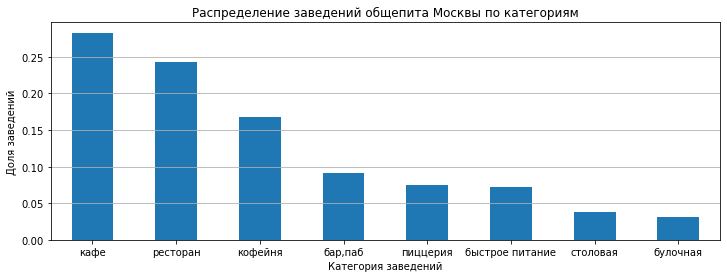

In [25]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 4))

display(df['category'].value_counts(normalize=True))

# Строим столбчатую диаграмму
df['category'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика — столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               title=f'Распределение заведений общепита Москвы по категориям'
)

plt.xlabel('Категория заведений')
plt.ylabel('Доля заведений')
plt.grid(axis='y')

plt.show()

Чуть меньше 30% заведений представлены категорией "кафе", ресторанов около 25%, на третьем месте по популярности кофейни (ок. 17%), далее идут бары, пиццерии и быстрое питание, имея примерно равные доли. Столовые и булочные имеют представленность менее 5%.

---

### Задача 2

Теперь посмотрим  какие административные районы Москвы присутствуют в данных. Будем использовать для визуализации линейчатую диаграмму для удобства чтения подписей.

In [26]:
#Подсчитаем количество заведений по районам в абсолютных значениях
df['district'].value_counts()

центральный административный округ         2242
северный административный округ             898
южный административный округ                892
северо-восточный административный округ     890
западный административный округ             850
восточный административный округ            798
юго-восточный административный округ        714
юго-западный административный округ         709
северо-западный административный округ      409
Name: district, dtype: int64

In [27]:
#Выведем доли заведений по районам
df['district'].value_counts(normalize=True)

центральный административный округ         0.266841
северный административный округ            0.106879
южный административный округ               0.106165
северо-восточный административный округ    0.105927
западный административный округ            0.101166
восточный административный округ           0.094977
юго-восточный административный округ       0.084980
юго-западный административный округ        0.084385
северо-западный административный округ     0.048679
Name: district, dtype: float64

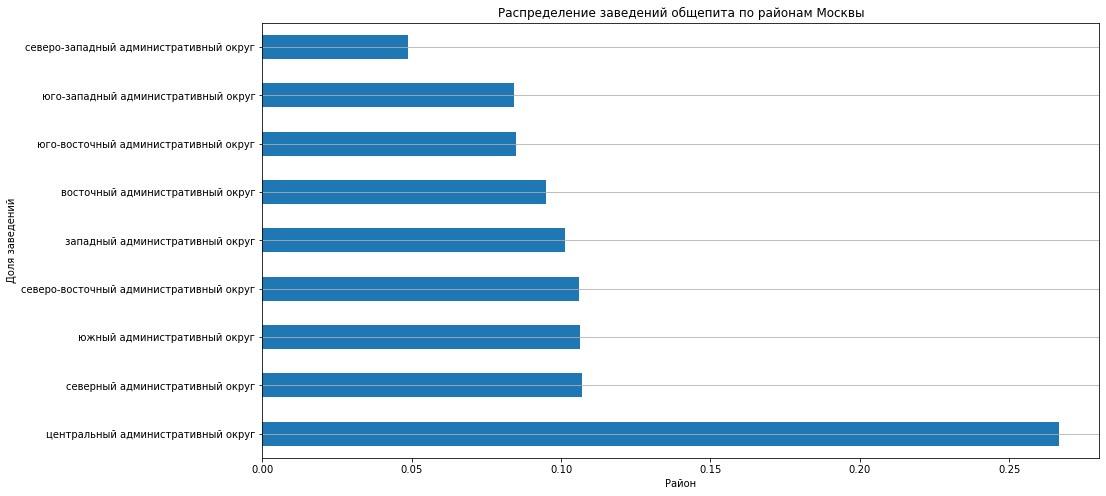

In [28]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 8))

# Строим линейчатую диаграмму с соотношением долей разных районов Москвы в общем количестве заведений.
df['district'].value_counts(normalize=True).plot(
               kind='barh', # Тип графика — линейчатую диаграмма
               rot=0, # Градус вращения подписи по оси Х
               title=f'Распределение заведений общепита по районам Москвы'
)

plt.xlabel('Район')
plt.ylabel('Доля заведений')
plt.grid(axis='y')

plt.show()

Итак, заведения общепита распределены по 9 районам Москвы. Большинство заведений (ок. 27%) сосредоточены в Центральном административном округе, меньше всего (менее 5%) - в Северо-западном. Остальные районы представлены относительно равномерно от 8 до 11%.

Рассмотрим распределение заведений по каждой категории в самом представленном районе - Центральном административном округе Москвы. 

ресторан           0.298840
кафе               0.206958
кофейня            0.190901
бар,паб            0.162355
пиццерия           0.050401
быстрое питание    0.038805
столовая           0.029438
булочная           0.022302
Name: category, dtype: float64

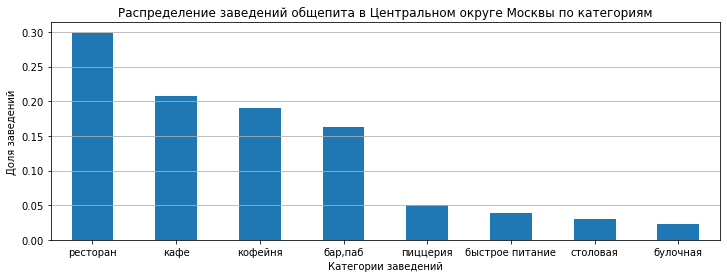

In [29]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 4))

display(df[df['district']=='центральный административный округ']['category'].value_counts(normalize=True))

# Строим столбчатую диаграмму для столбца с категориями заведений на основе отфильтрованной по центральному району таблицы
df[df['district']=='центральный административный округ']['category'].value_counts(normalize=True).plot(
               kind='bar',
               rot=0, 
               title=f'Распределение заведений общепита в Центральном округе Москвы по категориям'
)

plt.xlabel('Категории заведений')
plt.ylabel('Доля заведений')
plt.grid(axis='y')

plt.show()

In [30]:
df[df["district"] == "центральный административный округ"]["category"].value_counts(
    normalize=True
) / df[df["district"] != "центральный административный округ"]["category"].value_counts(
    normalize=True
)

бар,паб            2.494033
булочная           0.666880
быстрое питание    0.463249
кафе               0.666769
кофейня            1.193858
пиццерия           0.597063
ресторан           1.342711
столовая           0.728265
Name: category, dtype: float64

In [31]:
df[df["district"] != "центральный административный округ"]["category"].value_counts(
    normalize=True
) / df[df["district"] == "центральный административный округ"]["category"].value_counts(
    normalize=True
)

бар,паб            0.400957
булочная           1.499519
быстрое питание    2.158665
кафе               1.499770
кофейня            0.837621
пиццерия           1.674865
ресторан           0.744762
столовая           1.373126
Name: category, dtype: float64

Итак, мы видим, что распредение заведений по категориям в Центральном районе не совпадает с общей картиной по Москве. Здесь доля ресторанов значительно выше всех остальных категорий - 30%. Меньше кафе, пиццерий, булочных, точек быстрого питания и пиццерий, но ощутимо больше (в 2,5 раза больше, чем в остальных районах!) баров и пабов. 

---

### Задача 3

Теперь найдем  соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. 

In [32]:
#найдем соотношение сетевых и несетевых заведений в целом по всем данным:
df['chain'].value_counts(normalize=True)

0    0.618543
1    0.381457
Name: chain, dtype: float64

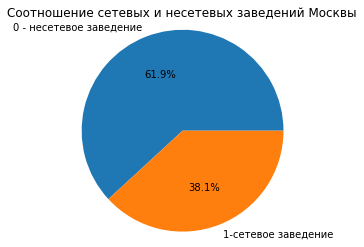

In [33]:
# Построим круговую диаграмму
plt.figure(figsize=(4, 4))  
plt.pie(df['chain'].value_counts(normalize=True),
        labels=['0 - несетевое заведение', '1-сетевое заведение'],
        autopct='%1.1f%%')

plt.axis('equal') 

plt.title('Соотношение сетевых и несетевых заведений Москвы')

plt.show()

38% заведений Москвы являются сетевыми - это довольно высокий процент, но несетевых заведений все же большинство. Теперь посмотрим количество и соотношение сетевых и несетевых заведений в разрезе категорий заведений.

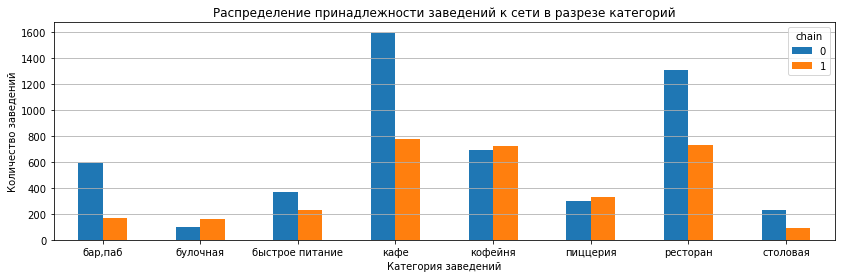

In [34]:
# Построим график столбчатой диаграммы
grouped_chain_count = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)
grouped_chain_count.plot(kind='bar',
               title=f'Распределение принадлежности заведений к сети в разрезе категорий',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Категория заведений',
               rot=0,
               figsize=(14, 4))
plt.grid(axis='y')

plt.show()

Теперь построим график, отображающий соотношение сетевых и несетевых заведений для каждой категории.

chain,0,1
category,,
булочная,0.386719,0.613281
пиццерия,0.478673,0.521327
кофейня,0.490446,0.509554
быстрое питание,0.615257,0.384743
ресторан,0.642332,0.357668
кафе,0.672138,0.327862
столовая,0.720635,0.279365
"бар,паб",0.779085,0.220915


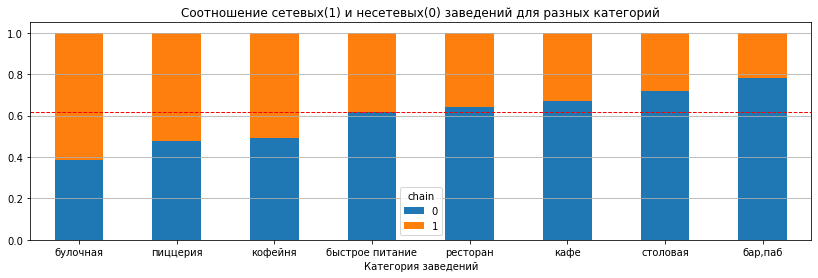

In [35]:
#Теперь построим график отображающий соотношение долей сетевых и несетевых заведений для всех категорий.
grouped_chain_share = df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0).sort_values(by=[0])
display(grouped_chain_share)
grouped_chain_share.plot(kind='bar',
               title=f'Соотношение сетевых(1) и несетевых(0) заведений для разных категорий',
               legend=True,
               stacked=True,          
               xlabel='Категория заведений',
               rot=0,
               figsize=(14, 4))

# Рассчитываем среднее значение доли несетевых заведений для всех категорий:
nonchain_share = df['chain'].value_counts(normalize=True)[0]

# Наносим на график линию с долей сетей:
plt.axhline(nonchain_share, 
            color='red', 
            linestyle='--', 
            linewidth=1, 
            label=f'Доля несетевых заведений по всем категориям{round(nonchain_share,2)}')

plt.grid(axis='y')

plt.show()

Соотношение сетевых и несетевых заведений в разрезе категорий заведений довольно сильно отличается. Чаще всего сетевыми заведениями являются булочные (61%),  пиццерии (52%) и кофейни  (51%). В остальных категориях преобладает доля несетевых заведений. Причем самая низкая доля сетевых заведений - среди баров и пабов.

---

### Задача 4


Теперь посмотрим на количество посадочных мест в заведениях, значения этого столбца относятся к непрерывным вещественным данным. При знакомстве с этими данными вначале стоит оценить статические показатели. Для этого используем метод describe():

In [36]:
#Отфильтруем данные от индикаторов:
df_filt_seats = df[df['seats'] >= 0].copy()
# Изучаем статистические показатели столбца 'seats', исключая строки с индикаторами:
df_filt_seats['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Итак, мы имеем информацию по количеству посадочных мест для 4792 заведений. Среднее значение равно 108 посадочным местам, при этом медиана равна 75, что уже говорит о неравномерном распределении и возможно о наличиии выбросов. Это же подтверждает и большое значение стандартного отклонения, а также максимальное значение, которое более, чем в 10 раз превышает среднее.
Проверим это и построим гистограмму распределения значений и диаграмму размаха для столбца с балансом.

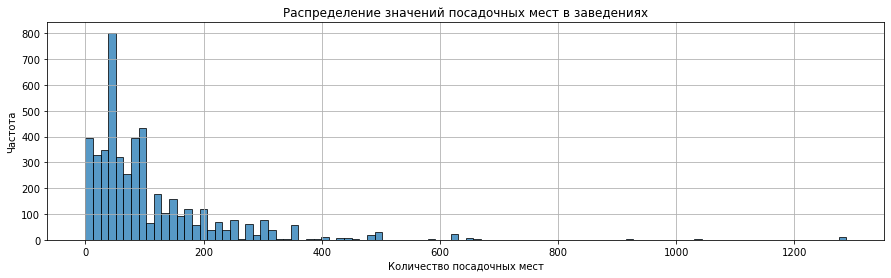

In [37]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 4))

# Строим гистограмму
df_filt_seats['seats'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=100, # Устанавливаем количество корзин 
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

plt.title('Распределение значений посадочных мест в заведениях')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
plt.grid()

plt.show()

График распределения подтвердил нашу теорию о неранвомерном распределнии, а также наличии выбросов, которые искажают статистические данные и в частности среднюю величину. Встречаются заведения с очень большьшим количеством посадочных мест, которые можно отнести в выбросам. Построим диаграмму размаха.

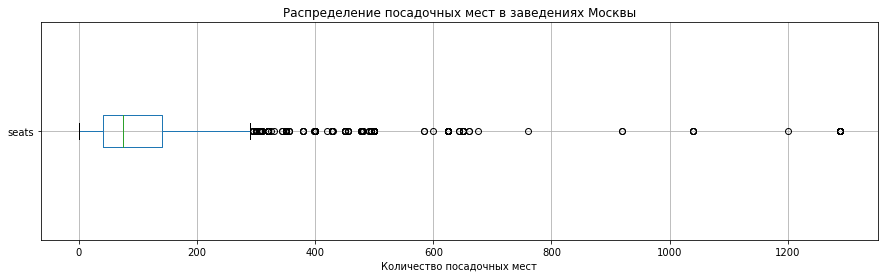

In [38]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(15, 4))

# Строим диаграмму размаха значений в столбце balance
df_filt_seats.boxplot(column='seats', vert=False)

plt.title('Распределение посадочных мест в заведениях Москвы')
plt.xlabel('Количество посадочных мест')

plt.show()

Рассчитаем межквартильный размах IQR для дальнейшей фильтрации данных от выбросов и корректного расчета статистических показателей. Так как распределение сильно смещено влево, возьмем коэфициент не 1,5, а 3 для расчета верхней границы данных.

In [39]:
#Находим IQR для столбца с посадочными местами 
#и далее с его помощью верхнюю границу значений, выше которой данные будут считаться выбросами:
q_75 = df_filt_seats['seats'].quantile(0.75)
q_25 = df_filt_seats['seats'].quantile(0.25)
seats_iqr = q_75 - q_25
upper_threshold = q_75 + (1.5*seats_iqr)
max_limit = q_75 + (3*seats_iqr)
print(f'75 процентиль равен {q_75}')
print(f'25 процентиль равен {q_25}')
print(f'Значение IQR равно {seats_iqr}')
print(f'Верхний порог выбросов по графику равен {upper_threshold}')
print(f'Скорректированный верхний порог значений без выбросов равен {max_limit}')

75 процентиль равен 140.0
25 процентиль равен 40.0
Значение IQR равно 100.0
Верхний порог выбросов по графику равен 290.0
Скорректированный верхний порог значений без выбросов равен 440.0


Итак, мы получили данные, что 50% значений посадочных мест сосредоточны в диапозоне от 40 до 140. Верхнюю границу значений, с которыми мы будем работать, условно определили на уровне 440 мест. Нижняя граница равна 0.

Как мы видим, медиана смещена влево, слева выбросы отсутсвуют, справа выбросов очень много и они сильно разбросаны. Для того, чтобы определить являются ли они случайными, посмотрим на заведения со значением посадочных мест, которые попали на графике в зону выбросов.

In [40]:
#Выведенм данные таблицы с количеством посадочных мест, попавших в зону выбросов:
df_filt_seats[df_filt_seats['seats'] > 290]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
127,8dd9dbd5defd45dbbebae8cecfdde80b,арарат,кафе,"москва, дмитровское шоссе, 165, корп. 1",северо-восточный административный округ,"ежедневно, 06:00–20:00",4.2,1,350,нет данных,нет данных,-1,-1,0
171,4b1169021ed44f77a0cc02a0c095cb43,one price coffee,кофейня,"москва, дмитровское шоссе, 163а, корп. 1",северо-восточный административный округ,"ежедневно, 10:00–22:00",4.0,1,350,нет данных,нет данных,-1,-1,0
176,34fd25c6f73141d6967f2d9c72bf5f61,вуди пицца,пиццерия,"москва, дмитровское шоссе, 107а, корп. 1",северный административный округ,"пн-пт 08:00–21:00; сб,вс 09:00–21:00",4.0,0,350,средние,средний счёт:400–600 ₽,500,-1,0
194,ec6f40b747fc4b45bbb0102d12ce8eef,ленкорань,кафе,"москва, дмитровское шоссе, 165, корп. 1",северо-восточный административный округ,"ежедневно, 06:00–20:00",1.4,0,350,нет данных,нет данных,-1,-1,0
215,4f4e35b59a6a4d96a67780fd1694179b,грузинский бульвар,быстрое питание,"москва, дмитровское шоссе, 163а, корп. 1",северо-восточный административный округ,"ежедневно, 10:00–22:00",4.0,0,350,нет данных,нет данных,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194,5cc55d53a83547e588d403c5ada1d28f,милти,быстрое питание,"москва, улица ленинская слобода, 19",южный административный округ,пн-пт 09:00–19:00,3.8,0,450,нет данных,нет данных,-1,-1,0
8216,63349daa46644d088732d6571b3dab6f,шеф гирос,быстрое питание,"москва, проспект андропова, 22",южный административный округ,"ежедневно, 09:00–22:00",4.2,0,300,нет данных,средний счёт:250–350 ₽,300,-1,0
8233,dbc3aeaf0a8543da966d01ce432d48c9,pasta cup & pinsa,пиццерия,"москва, автозаводская улица, 18",южный административный округ,"ежедневно, 10:00–22:00",3.5,0,455,средние,средний счёт:450–700 ₽,575,-1,0
8311,0fe1bb796f5143359444382245e247e0,чайхана бишкек,ресторан,"москва, тихорецкий бульвар, 2, корп. 1",юго-восточный административный округ,"ежедневно, 09:00–01:30",4.1,0,305,нет данных,нет данных,-1,-1,0


Можно заметить, что адреса и количество посадочных мест у многих заведений совпадают, а это значит, что возможно речь идет о фудкортах, или общем количестве посадочных мест для всех заведений общепита в одном здании. А значит эти данные могут исказить наши выводы. Проверим нашу гипотезу с помщью группировки по количеству посадочных мест и адресам.

In [41]:
# Выведенм сгруппированные данные таблицы с количеством посадочных мест более 300 (зона выбросов):
df_group_filt_seats = df_filt_seats.groupby(["seats", "address"])[
    "id"
].count().sort_values(ascending=False).head(15)
display(df_group_filt_seats)


seats  address                                 
100    москва, усачёва улица, 26                   26
300    москва, площадь киевского вокзала, 2        20
276    москва, ярцевская улица, 19                 19
500    москва, лесная улица, 20, стр. 3            16
45     москва, хорошёвское шоссе, 27               16
350    москва, пресненская набережная, 2           16
273    москва, проспект мира, 211, корп. 2         15
86     москва, профсоюзная улица, 56               15
92     москва, мытная улица, 74                    14
320    москва, улица вавилова, 3                   14
100    москва, проспект вернадского, 86а           12
150    москва, щукинская улица, 42                 11
160    москва, верхняя красносельская улица, 3а    11
180    москва, проспект вернадского, 6             11
75     москва, хабаровская улица, 15               11
Name: id, dtype: int64

Наша гипотеза подтвердилась, многие заведения, в  т.ч. с большим количеством посадочных мест, имеют одинаковые данные по адресу и количеству посадочных мест. Возможно для них указано общее количество посадочных мест для всего здания или речь идет о фудкортах.

Теперь проверим наиболее типичное для каждой категории заведений количество посадочных мест. Рассчитаем для этого медиану для каждой категории заведений.

category
булочная           49.5
пиццерия           52.0
кафе               60.0
быстрое питание    64.0
кофейня            75.0
столовая           75.0
бар,паб            80.0
ресторан           83.0
Name: seats, dtype: float64

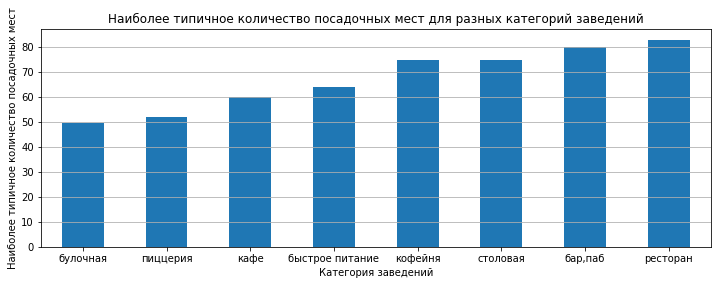

In [42]:
#Сгруппируем очищенные от индикаторов даенные по категориям заведений,
#вычислим для каждого медиану и построим столбчатую диаграмму.
grouped_seats_median = df_filt_seats[df_filt_seats['seats'] <= 440].groupby('category')['seats'].median().sort_values()
display(grouped_seats_median)
grouped_seats_median.plot(kind='bar',
               title=f'Наиболее типичное количество посадочных мест для разных категорий заведений',
               legend=False,
               ylabel='Количество посадочных мест',
               xlabel='Категория заведений',
               rot=0,
               figsize=(12, 4))
plt.grid(axis='y')

plt.show()

Таким образом, наиболее типичное количество посадочных мест для булочных и пиццерий около 50. Для кафе и быстрого питания чуть больше - 60 и 64 соответсвенно, для коффеен и столовых - 75, для баров и ресторанов требуется больше всего места, средняя посадка - 80 и 83 места соответсвенно. На такое распределение данных очевидно повлияла выявленная нами особенность, что если заведения находятся по одному адресу, то для них указывается общее количество посадочных мест. 

Проверим еще один параметр для каждой категории заведений - моду или наиболее часто встречающееся количество посадочных мест.

category
булочная             0
быстрое питание      0
кафе                40
пиццерия            40
столовая            40
бар,паб             60
кофейня            100
ресторан           100
Name: seats, dtype: int16

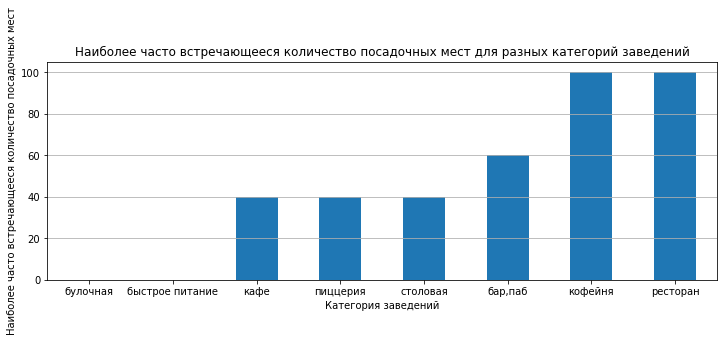

In [69]:
#сделаем аналогичные расчеты, заменив медиану на моду.
grouped_seats_mode = (
    df_filt_seats[df_filt_seats["seats"] <= 440]
    .groupby("category")["seats"]
    .agg(lambda x: x.mode())
    .sort_values()
)
display(grouped_seats_mode)
grouped_seats_mode.plot(kind='bar',
               title=f'Наиболее часто встречающееся количество посадочных мест для разных категорий заведений',
               legend=False,
               ylabel='Количество посадочных мест',
               xlabel='Категория заведений',
               rot=0,
               figsize=(12, 4))
plt.grid(axis='y')

plt.show()

Как видно по графику, значения моды и медианы довольно сильно расходятся. Несмотря на то, что наиболее типичное значение для булочных и быстрого питания 50 и 64 соответственно, эти заведения часто могут не иметь посадочных мест совсем. Для кафе, пиццерий и столовых самое часто встречающееся количество посадочных мест - 40, для баров - 60, для кофеен и ресторанов - 100.

---

### Задача 5

Теперь изучим рейтинг заведений, выведем основные статистические показатели, построим гистограмму и график размаха, посмотрим усредненные рейтинги для разных типов заведений.

In [44]:
# Изучаем статистические показатели столбца 'seats', исключая строки с индикаторами:
df['rating'].describe()

count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

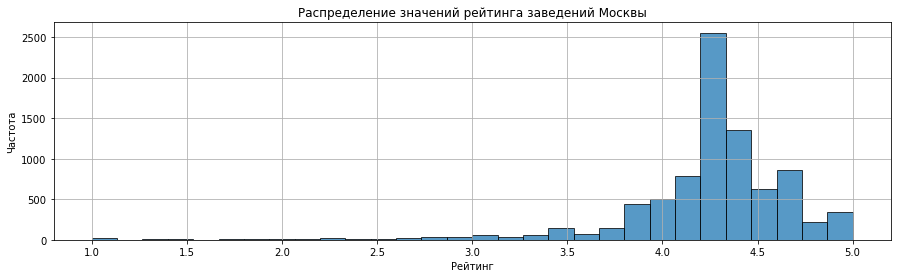

In [45]:
# Создаём контейнер графика для распределения рейтинга matplotlib и задаём его размер
plt.figure(figsize=(15, 4))

# Строим гистограмму
df['rating'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=30, # Устанавливаем количество корзин 
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

plt.title('Распределение значений рейтинга заведений Москвы')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.grid()

plt.show()

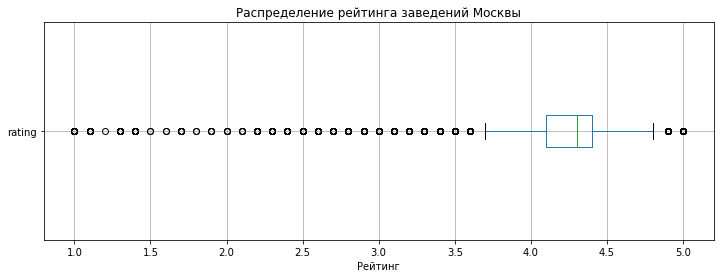

In [46]:
# Создаём контейнер графика для диаграммы размаха по рейтингу matplotlib и задаём его размер
plt.figure(figsize=(12, 4))

# Строим диаграмму размаха значений в столбце balance
df.boxplot(column='rating', vert=False)
plt.title('Распределение рейтинга заведений Москвы')
plt.xlabel('Рейтинг')

plt.show()

Мы видим, что наиболее типичный рейтинг заведений Москвы находится в диапозоне от 4.1 до 4.4. Медиана смещена вправо и равна 4.3, стандартное отклонение относительно небольшое. Однако те значения рейтинга, которые попали в область выбросов вряд ли можно к ним отнести, потому что в жизни действительно встречаются заведения и с рейтингом 1 и с рейтигом 5. Длинный левый хвост гистограммы указывает на то, что заведения с низким рейтингов встречаются крайне редко.
Теперь сгруппируем данные по категориям заведений, найдем для них устредненные значения рейтинга и сделаем визуализацию.

category
бар,паб            4.4
булочная           4.3
быстрое питание    4.2
кафе               4.2
кофейня            4.3
пиццерия           4.3
ресторан           4.3
столовая           4.3
Name: rating, dtype: float64

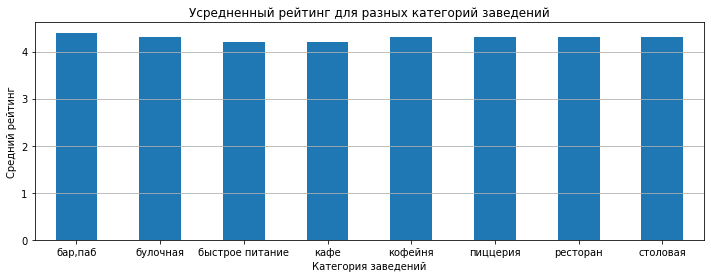

In [47]:
#Сгруппируем даенные по категориям заведений, вычислим для кажого медиану и построим столбчатую диаграмму.
grouped_rating_median = df.groupby('category')['rating'].median()
display(grouped_rating_median)
grouped_rating_median.plot(kind='bar',
               title=f'Усредненный рейтинг для разных категорий заведений',
               legend=False,
               ylabel='Средний рейтинг',
               xlabel='Категория заведений',
               rot=0,
               figsize=(12, 4))
plt.grid(axis='y')

# Выводим график
plt.show()

Как мы видим, средний рейтинг заведений для разных категорий заведений примерно одинаковый: чуть ниже у кафе и быстрого питания, чуть выше у баров.

---

### Задача 6

Изучим взаимосвязи рейтинга заведений с другими признаками. Для этого воспользуемся библиотекой phik, которая помогает изучать связи между данными разного типа, непрерывными и категориальными.
Рассчитаем матрицу корреляции phi_k для данных о заведениях общепита Москвы. Для составления матрицы корреляции отберем данные, которые могут повлиять на рейтинг заведения: район, категория заведения, режим работы (круглосуточный или нет), принадлежность к сети, количество посадочных мест, категория цен в заведении.

In [48]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df[['category', 'district', 'rating', 'chain', 'seats',
                         'price', 'is_24_7']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
df_heatmap = correlation_matrix.loc[correlation_matrix.index != "rating"][
    ["rating"]
].sort_values(by="rating", ascending=False)
display(df_heatmap)

interval columns not set, guessing: ['rating', 'chain', 'seats', 'is_24_7']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.281253
district,0.200761
category,0.189677
is_24_7,0.150365
chain,0.108114
seats,0.000000


Визуализируем результат корреляции с помощью тепловой карты и библиотеки seaborn.

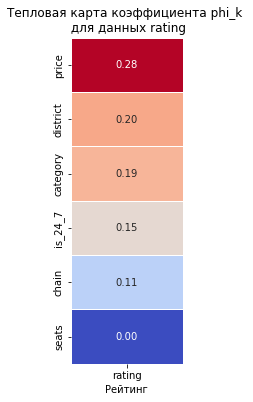

In [49]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

sns.heatmap(df_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг')

plt.show()

Высокой корреляции с рейтингом заведения не наблюдается ни по одному из выбранных нами признаков. Наибольшая корреляция рейтинга заведения просматривается с показателем ценовой категории (0.28) и  районом расположения(0.2) Просматривается  небольшая корреляция рейтинга с круглосуточным режимом работы и категорией заведения. По остальным признакам корреляция практически отсутсвует.

Чтобы узнать характер выявленных связей,  продолжим анализ. 

Проверим связь ценовой категории заведения и его рейтинга.

price
высокие          4.4
выше среднего    4.4
нет данных       4.3
низкие           4.2
средние          4.3
Name: rating, dtype: float64

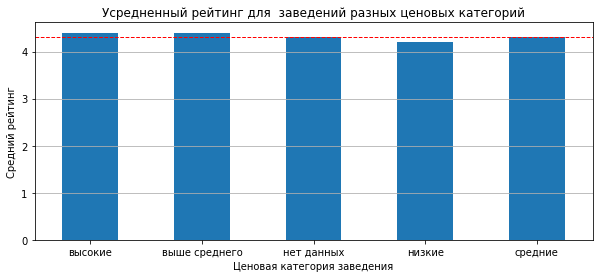

In [50]:
#Сгруппируем даенные по ценовой категориям заведений, вычислим для кажого медиану и построим столбчатую диаграмму.
grouped_price_median = df.groupby('price')['rating'].median()
display(grouped_price_median)
grouped_price_median.plot(kind='bar',
               title= 'Усредненный рейтинг для  заведений разных ценовых категорий',
               legend=False,
               ylabel='Средний рейтинг',
               xlabel='Ценовая категория заведения',
               rot=0,
               figsize=(10, 4))

# Рассчитываем среднее значение по рейтингу для всех категорий:
median_rating = df['rating'].median()

# Наносим на график линию с средним рейтингом:
plt.axhline(median_rating, 
            color='red', 
            linestyle='--', 
            linewidth=1, 
            label=f'Средний рейтинг по всем заведениям{round(median_rating,2)}')
plt.grid(axis='y')

plt.show()

Медианное значение рейтинга для заведений разных ценовых категорий практически не отличается, однако все же можно отмеить, что заведения с высокой и выше среднего ценовой категорией имеют рейтинг чуть выше, с низкой - меньше. Проверим средние значения рейтинга в зависимости ценовой политики в разрезе категорий. Для этого построим сводную таблицу.

In [51]:
pivot_rating_price = df.pivot_table(
    values='rating',
    index='price',
    columns='category',
    aggfunc='mean'
)
display(pivot_rating_price)

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
price,,,,,,,,
высокие,4.485950,4.400000,4.200000,3.976667,4.441176,4.446667,4.468519,4.200000
выше среднего,4.433987,4.350000,4.280000,4.403846,4.328571,4.305000,4.374627,4.000000
нет данных,4.304059,4.275349,3.987167,4.083534,4.250587,4.278261,4.211426,4.158025
низкие,3.900000,4.266667,3.981818,4.026923,4.286765,4.225000,4.180952,4.190000
средние,4.409174,4.175000,4.212500,4.236874,4.332626,4.314768,4.317467,4.277857


В целом небольшая зависимость рейтинга от ценовой категории заведения сохраняется и в разрезе категорий заведений с небольшими исключениями. Так высокие цены в кафе снижают его рейтинг, столовые имеют самый высокий рейтинг в средней ценовой категории. А вот бары и рестораны имеют более выраженную зависимость "чем выше ценовая категория, тем выше рейтинг", чем остальные заведения.

Проверим также характер зависимости рейтинга от расположения (района) заведения.

district
северо-восточный административный округ    4.2
юго-восточный административный округ       4.2
восточный административный округ           4.3
западный административный округ            4.3
северный административный округ            4.3
северо-западный административный округ     4.3
юго-западный административный округ        4.3
южный административный округ               4.3
центральный административный округ         4.4
Name: rating, dtype: float64

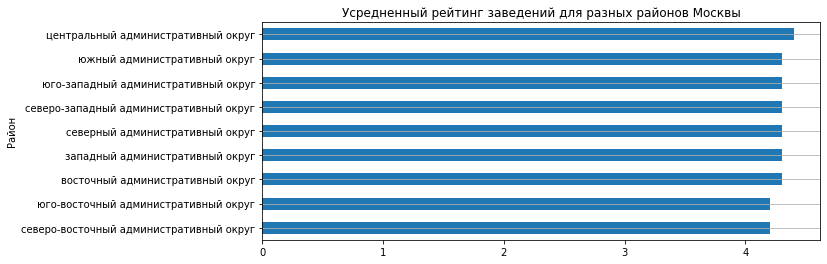

In [52]:
#Сгруппируем данные по району, вычислим для кажого медиану и построим столбчатую диаграмму.
grouped_district_median = df.groupby('district')['rating'].median().sort_values()
display(grouped_district_median)

grouped_district_median.plot(kind='barh',
               title= 'Усредненный рейтинг заведений для разных районов Москвы',
               legend=False,
               ylabel='Средний рейтинг',
               xlabel='Район',
               rot=0,
               figsize=(10, 4))

median_rating = df['rating'].median()

plt.grid(axis='y')

plt.show()

Здесь зависимость тоже слабая, но можно отметить, чтов Ценральном округе рейтинг заведений чуть выше, в Северо-восточном и Юго-восточномчуть ниже. Теперь также сделаем сводную таблицу для среднийх значений рейтинга в разрезе категорий и районов.

In [53]:
pivot_rating_district = df.pivot_table(
    values='rating',
    index='district',
    columns='category',
    aggfunc='mean'
)
display(pivot_rating_district)

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
district,,,,,,,,
восточный административный округ,4.315094,4.168000,4.043662,4.098162,4.282857,4.269444,4.186875,4.232500
западный административный округ,4.398000,4.264865,3.969355,4.075630,4.195333,4.288732,4.257339,4.112500
северный административный округ,4.327941,4.253846,3.975862,4.185043,4.291710,4.292208,4.290426,4.217073
северо-восточный административный округ,4.190476,4.342857,4.032927,4.053532,4.216981,4.255882,4.208840,4.082500
северо-западный административный округ,4.391304,4.283333,3.950000,4.047826,4.325806,4.337500,4.292661,4.188889
центральный административный округ,4.486264,4.372000,4.234483,4.302371,4.336449,4.411504,4.416119,4.315152
юго-восточный административный округ,4.200000,4.038462,3.925373,4.047872,4.225843,4.185455,4.156552,4.104000
юго-западный административный округ,4.350000,4.155556,4.086885,4.036975,4.283333,4.340625,4.225595,4.241176
южный административный округ,4.276471,4.340000,4.101176,4.093939,4.232824,4.258904,4.212376,4.261364


В разрезе каждой категории мы также видим, что рейтинг заведений в центральном округе выше без исключений.

Проверим также связь с рейтингом  для столбцов 'chain' и 'is_24_7' с бинарными признаками в целом по всем заведениям и в разрезе категорий.

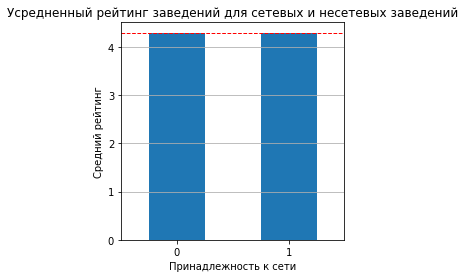

In [54]:
#Сгруппируем данные по принадлежности к сети, вычислим для кажого медиану и построим столбчатую диаграмму.
grouped_chain_median = df.groupby('chain')['rating'].median()

grouped_chain_median.plot(kind='bar',
               title= 'Усредненный рейтинг заведений для сетевых и несетевых заведений',
               legend=False,
               ylabel='Средний рейтинг',
               xlabel='Принадлежность к сети',
               rot=0,
               figsize=(4, 4))

# Наносим на график линию с средним рейтингом:
plt.axhline(median_rating, 
            color='red', 
            linestyle='--', 
            linewidth=1, 
            label=f'Средний рейтинг по всем заведениям{round(median_rating,2)}')

plt.grid(axis='y')

# Выводим график
plt.show()

In [55]:
#Построим сводную таблицу со средними значениями рейтинга для сетевых и несетевых заведений в разрезе категорий.
pivot_rating_chain = df.pivot_table(
    values='rating',
    index='chain',
    columns='category',
    aggfunc='mean'
)
display(pivot_rating_chain)

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
chain,,,,,,,,
0,4.386913,4.240404,4.046361,4.088040,4.350505,4.321122,4.325248,4.201322
1,4.390533,4.285987,4.056466,4.198588,4.206806,4.283030,4.227671,4.237500


В целом по всем заведениям медиана по рейтингу одинакова для сетевых и несетевых заведений. В разрезе категорий есть незначительные расхождения: сетевые кафе имеют рейтинг чуть выше, чем несетевые, а для кофеен, пиццерий и ресторанов рейтинг сетевых заведений наоборот чуть ниже.

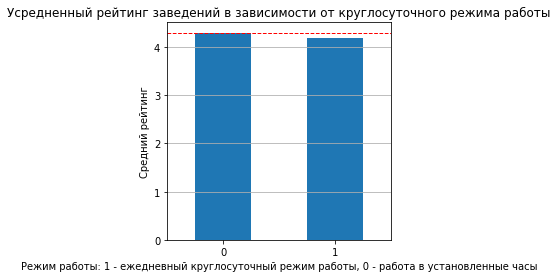

In [56]:
#Сгруппируем данные по режиму работы, вычислим для кажого медиану и построим столбчатую диаграмму.
grouped_hours_median = df.groupby('is_24_7')['rating'].median()

grouped_hours_median.plot(kind='bar',
               title= 'Усредненный рейтинг заведений в зависимости от круглосуточного режима работы',
               legend=False,
               ylabel='Средний рейтинг',
               xlabel='Режим работы: 1 - ежедневный круглосуточный режим работы, 0 - работа в установленные часы',
               rot=0,
               figsize=(4, 4))

# Наносим на график линию с средним рейтингом:
plt.axhline(median_rating, 
            color='red', 
            linestyle='--', 
            linewidth=1, 
            label=f'Средний рейтинг по всем заведениям{round(median_rating,2)}')

plt.grid(axis='y')

plt.show()

In [57]:
#Построим сводную таблицу со средними значениями рейтинга в зависимости от режима работы в разрезе категорий.
pivot_rating_chain = df.pivot_table(
    values='rating',
    index='is_24_7',
    columns='category',
    aggfunc='mean'
)
display(pivot_rating_chain)

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
is_24_7,,,,,,,,
0,4.402525,4.290086,4.088962,4.136463,4.280355,4.313953,4.296537,4.209901
1,4.184615,4.058333,3.933333,4.028090,4.206780,4.054839,4.202963,4.250000


Заведения имеющие крглосуточный ежедневный режим работы имеют рейтиг чуть ниже, исключение составляют только столовые.

---

### Задача 7

Теперь посмотрим какие сетевые заведения являются самыми популярными в Москве по количеству открытых точек. Вычислим для них средний рейтинг и посмотрим к какой категории заведений они принадлежат.

In [58]:
#Отфильтруем таблицу по сетевым заведениям
df_chain = df[df['chain'] == 1].copy()
#Создадим сводную таблицу с названиями сетевых заведений, их категориями,
#количеством заведений в каждой сети и средним рейтингом:
pivot_chain = pd.pivot_table(
    df_chain,
    index='name',
    values=['category', 'rating'],
    aggfunc={'category': pd.Series.mode, 'rating': ['count', 'mean']}
)

#переименуем столбцы таблицы:
columns_names = ['category', 'count_rest', 'mean_rating']
pivot_chain.columns = columns_names

#округлим значения среднего рейтинга:
pivot_chain['mean_rating'] = pivot_chain['mean_rating'].round(2)

#отсортируем сводную таблицу по количеству заведений в сети и выведем 15 самых представленных в Москве:
top_15_df = pivot_chain.sort_values(by='count_rest', ascending=False).head(15)
display(top_15_df)

,category,count_rest,mean_rating
name,,,
шоколадница,кофейня,120,4.18
домино'с пицца,пиццерия,76,4.17
додо пицца,пиццерия,74,4.29
one price coffee,кофейня,71,4.06
яндекс лавка,ресторан,69,3.87
cofix,кофейня,65,4.08
prime,ресторан,50,4.12
хинкальная,кафе,44,4.32
кофепорт,кофейня,42,4.15


Построим график с 15 самыми популярными сетями общепита в Москве по количеству заведений.

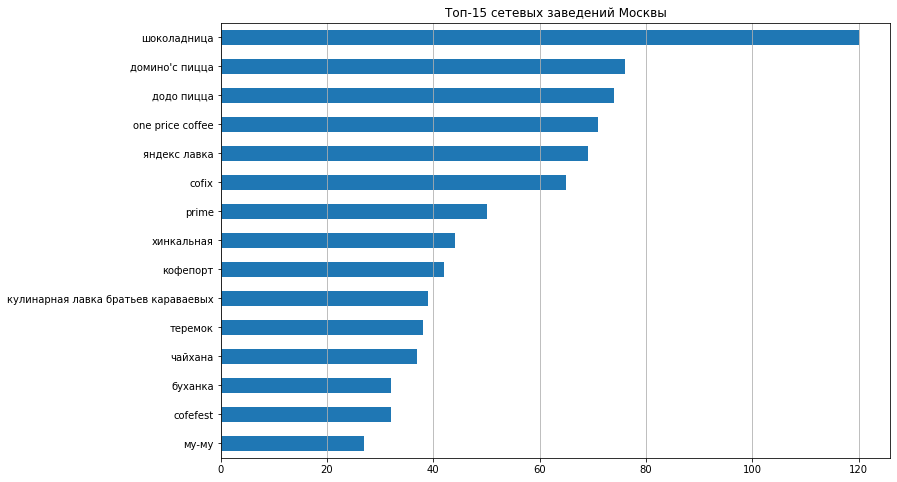

In [59]:
#Выведем линейчатую диаграмму с топом 15 сетевых заведений в Москве для наглядности:
top_15 = df_chain.groupby('name')['rating'].count().sort_values(ascending=False).head(15)
top_15 = top_15.sort_values()
top_15.plot(kind='barh',
               title= 'Топ-15 сетевых заведений Москвы',
               legend=False,
               ylabel='Количество заведений',
               xlabel='',
               rot=0,
               figsize=(12, 8))
plt.grid(axis='x')

plt.show()

Теперь построим график, отображающий рейтинг данных заведений

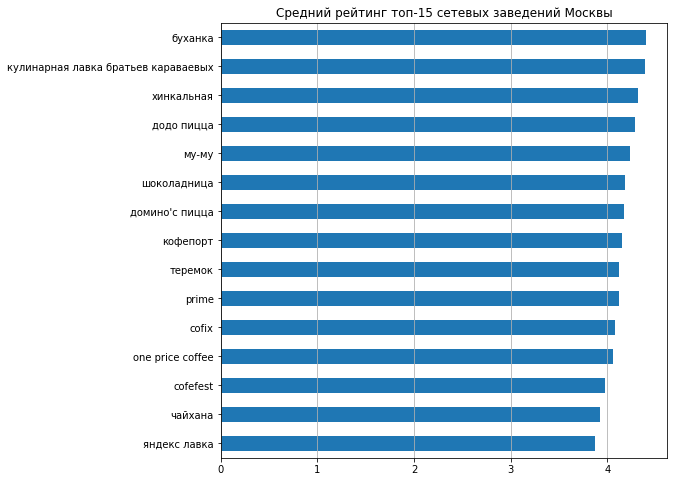

In [60]:
#Выведем линейчатую диаграмму с топом 15 сетевых заведений в Москве для наглядности:
top_15_df_rating = top_15_df['mean_rating'].sort_values()
top_15_df_rating.plot(kind='barh',
               title= 'Средний рейтинг топ-15 сетевых заведений Москвы',
               legend=False,
               ylabel='Рейтинг',
               xlabel='',
               rot=0,
               figsize=(8, 8))
plt.grid(axis='x')

# Выводим график
plt.show()

Самой популярной сетью оказались кофейни "Шоколадница" - 119 заведений в Москве! В топе сетевых заведений нет баров, быстрого питания и столовых. Чаще других сетевых заведений встречаются кофейни. 
Отметим также, что большинство сетевых заведений, попавших в топ-15 по Москве имеют рейтинг ниже среднего (медианы) по всем заведениям Москвы, в т.ч. самая распространенная Шоколадница. Среди заведений с рейтингом выше среднего: кафе "Хинкальная" и "Кулинарная лавка братьев Караваевых" и булочная "Буханка".
Тем не менее, несмотря на рейтинг, эти заведения пользуются большой популярностью среди москвичей.

---

### Задача 8

Изучим вариацию среднего чека заведения в зависимости от района Москвы. Для этого построим сводную таблицу со средним, минимальным и максимальным значением среднего чека для кажого района.

In [61]:
#Сначала отфильтруем таблицу от значений-индикаторов:
df_filt_bill = df[df['middle_avg_bill'] > 0].copy()

# Посмотрим общую статистику по столбцу:
display(df_filt_bill['middle_avg_bill'].describe())

#Создадим сводную таблицу с районом города и основными показателями среднего чека:
pivot_bill = pd.pivot_table(
    df_filt_bill,
    index= 'district',
    values='middle_avg_bill',
    aggfunc= ['count', 'mean', 'max', 'min']
)

#переименуем столбцы таблицы:
columns_bill_names = ['count_rest', 'mean_bill', 'max_bill', 'min_bill']
pivot_bill.columns = columns_bill_names

#округлим значения среднего чека:
pivot_bill['mean_bill'] = pivot_bill['mean_bill'].round(2)

#отсортируем таблицу по среднему значения чека:
pivot_bill_sort = pivot_bill.sort_values(by='mean_bill', ascending=False)
display(pivot_bill_sort)

count     3148.000000
mean       958.358005
std       1009.748800
min         30.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

,count_rest,mean_bill,max_bill,min_bill
district,,,,
центральный административный округ,1059,1192.18,7250,67
западный административный округ,306,1053.23,5250,50
северный административный округ,322,927.96,11000,130
южный административный округ,314,834.40,35000,100
северо-западный административный округ,157,822.22,2900,120
восточный административный округ,260,820.63,10000,50
юго-западный административный округ,235,792.56,2750,100
северо-восточный административный округ,301,716.61,4500,50
юго-восточный административный округ,194,654.10,3750,30


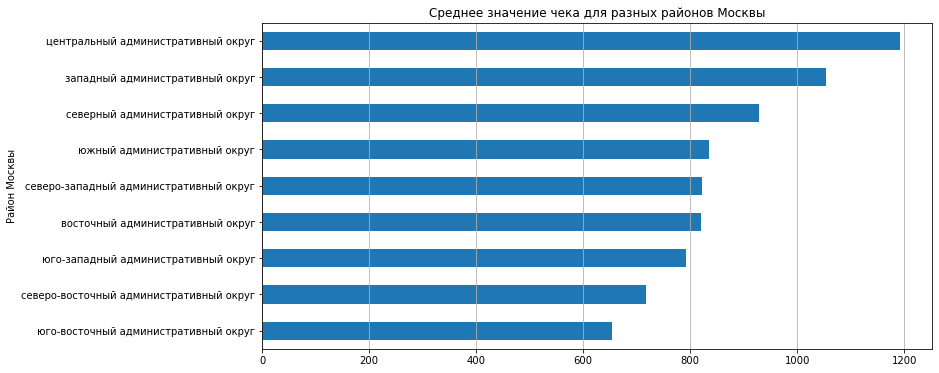

In [62]:
#Выведем линейчатую диаграмму со средним значением чека для наглядности:
mean_bill = df_filt_bill.groupby('district')['middle_avg_bill'].mean().sort_values()

mean_bill.plot(kind='barh',
               title= 'Среднее значение чека для разных районов Москвы',
               legend=False,
               ylabel='Среднее значение чека',
               xlabel='Район Москвы',
               rot=0,
               figsize=(12, 6))
plt.grid(axis='x')

# Выводим график
plt.show()

Итак, как и ожидалось, самый высокий средний чек по заведениям характерен для Центрального административного округа. За ним идет Западный и Северный. В Юго-восточном округе значение среднего чека самое низкое, почти в 2 раза ниже, чем в Центальном.
Минимальные значения по чекам небольшие и скорее всего это средние чеки из булочных или кофеен.
А вот максимальные значения чеков интересны. Самый высокий средний чек относится к Южному административному округу, также максимальные значения чека выше в Северном и Восточном округе, чем в Центальном. Возможно речь идет о единичных "престижных" заведениях или о выбросах. Посмотрим на эти заведения.

In [63]:
#Выведем топ-5 заведений Москвы с самым высоким средним чеком
top5_bill = (
    df_filt_bill[['name', 'district', 'category', 'rating', 'chain', 'avg_bill', 'middle_avg_bill']]
    .sort_values(by='middle_avg_bill', ascending=False)
    .head(5)
)
display(top5_bill)

,name,district,category,rating,chain,avg_bill,middle_avg_bill
7173,кафе,южный административный округ,ресторан,4.1,0,средний счёт:20000–50000 ₽,35000
729,чойхона,северный административный округ,"бар,паб",4.4,0,средний счёт:5000–17000 ₽,11000
5477,гости,восточный административный округ,ресторан,4.1,0,средний счёт:5000–15000 ₽,10000
3878,white rabbit,центральный административный округ,ресторан,4.9,0,средний счёт:7000–7500 ₽,7250
3483,800°с contemporary steak,центральный административный округ,ресторан,4.7,0,средний счёт:6000–8000 ₽,7000


---

### Задача 9

Проверим еще один параметр, который не рассматривали ранее. Посмотрим существует ли взаимосвязь стоимости чашки кофе в заведении и его рейтингом.

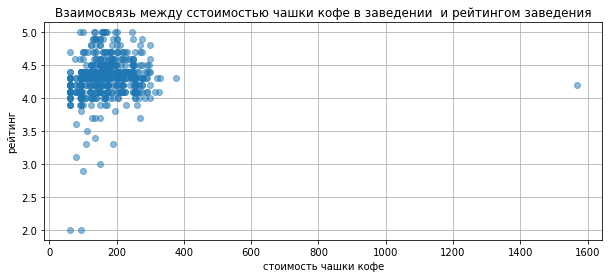

In [64]:
#отфильтровываем нулевые и индикаторные значения
df_filt_coffee_bill = df[df['middle_coffee_cup'] > 0].copy()

# Создаём контейнер графика
plt.figure(figsize=(10, 4))

# Строим  график
plt.plot(df_filt_coffee_bill['middle_coffee_cup'],
         df_filt_coffee_bill['rating'],
         marker='o', 
         linestyle='', 
         alpha=0.5)

# Добавляем заголовок и метки осей
plt.title('Взаимосвязь между сстоимостью чашки кофе в заведении  и рейтингом заведения')
plt.xlabel('стоимость чашки кофе')
plt.ylabel('рейтинг')
plt.grid()


# Отображаем график
plt.show()

Как видно из графика, данные не показывают четкой взаимосвязи. Большинство значений сосредоточены в диапозоне рейтинга от 4 до 4,5 и стоимостью чашки от 50 до 150 руб.

Изучим наиболее характерное значение среднего чека для разных категорий заведений.

category
ресторан           1367.88
бар,паб            1338.76
пиццерия            789.38
кафе                707.75
булочная            658.77
кофейня             617.30
быстрое питание     445.76
столовая            335.35
Name: middle_avg_bill, dtype: float64

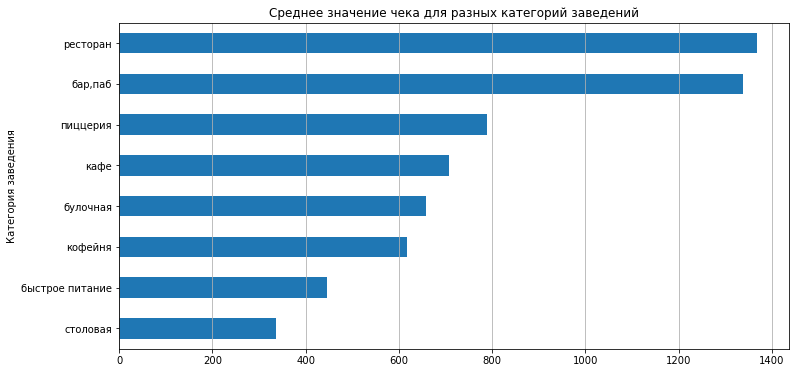

In [65]:
#Выведем линейчатую диаграмму со средним значением чека для наглядности:
mean_bill_category = df_filt_bill.groupby('category')['middle_avg_bill'].mean().sort_values().round(2)
display(mean_bill_category.sort_values(ascending=False))
mean_bill_category.plot(kind='barh',
               title= 'Среднее значение чека для разных категорий заведений',
               legend=False,
               ylabel='Среднее значение чека',
               xlabel='Категория заведения',
               rot=0,
               figsize=(12, 6))
plt.grid(axis='x')

# Выводим график
plt.show()

Самый высокий средний чек ожидаемо в ресторанах, но бары и пабы практически не отстают от них. Самый низкий чек характерен для столовых, а вот булочные неожиданно имеют довольно высокое значение среднего чека - на уровне кафе и кофеен.

Изучим данные по стоимости чашки кофе, приведенные в датасете. Сначала посмотри, для каких категорий заведений есть данные.

In [66]:
#Отфильтруем данные от индикаторов и нулевых значений

df_filt_coffee_bill = df[df['middle_coffee_cup'] > 0].copy()

#Рассчитаем количество данных для каждой категории заведений
count_сoffee_bill_category = df_filt_coffee_bill.groupby('category')['middle_coffee_cup'].count().sort_values()
display(count_сoffee_bill_category)

category
быстрое питание      1
пиццерия             3
кафе                 4
бар,паб              6
кофейня            521
Name: middle_coffee_cup, dtype: int64

Как видно, данные по стоимости чашки кофе приведены в основном для кофеен. Посмотрим как меняется стоимость 1 чашки кофе в зафисимости от района Москвы

district
юго-восточный административный округ       151.09
южный административный округ               158.49
северо-восточный административный округ    165.33
северо-западный административный округ     165.52
северный административный округ            165.79
восточный административный округ           174.02
юго-западный административный округ        184.18
центральный административный округ         187.52
западный административный округ            189.94
Name: middle_coffee_cup, dtype: float64

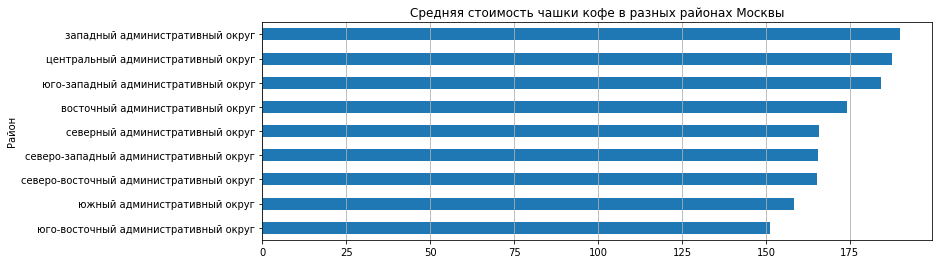

In [67]:
coffee_bill = df_filt_coffee_bill[df_filt_coffee_bill['category']=='кофейня']
mean_сoffee_bill = coffee_bill.groupby('district')['middle_coffee_cup'].mean().sort_values().round(2)
display(mean_сoffee_bill)
mean_сoffee_bill.plot(kind='barh',
               title= 'Средняя стоимость чашки кофе в разных районах Москвы',
               legend=False,
               ylabel='Средняя стоимость чашки кофе',
               xlabel='Район',
               rot=0,
               figsize=(12, 4))
plt.grid(axis='x')

# Выводим график
plt.show()

Неожиданно, но самый дорогой капучино оказался в Западном административном округе, обогнав по стоимости кофе в Центральном округе. В Юго-Восточном округе стоимость чашки кофе оказалась самой низкой, как и значение среднего чека для всех категорий заведений. В целом разброс цен на кофе по Москве оказался небольшим в отличие от среднего чека по всем заведениям.

---

### Промежуточный вывод

##### Мы провели исследовательский анализ данных: 
- подробно изучили данные в столбцах со значениями категорий, районов расположения, принадлежности заведения к сети, посадочных мест и рейтинга,  
- изучили взаимосвязь рейтинга заведений с другими параметрами,
- выделили топ-15 сетевых заведений
- изучили вариацию среднего чека заведения в зависимости от района Москвы,
- сопроводили все полученные данные соответствующими визуализациями.

##### По полученным данным можно сделать следующие выводы:
- самым распространенным типом заведений общепита в Москве является кафе, далее идут рестораны и кофейни;
- больше всего заведений расположено в Центральном округе Москвы (ок. 27%), меньше всего в Северо-западном;
- в Центральном округе сосредоточена основная масса ресторанов (ок.30% от всех заведений в районе), баров и пабов,  кафе же более популярны в периферийной части Москвы;
- сетевыми является 38% заведений по всей Москве, при этом среди пиццерий, булочных и кофеен сетевые заведения встречаютсся гораздо чаще и их доля выше, чем несетевых;
- количество посадочных мест имеет очень большой размах, но большинство значений колеблиться от 40 до 140. Для заведений, расположенных в одном и том же здании скорее всего указано общее количество посадочных мест на здание, тем не мене можно выделить наиболее типичное  количество посадочных мест для разных категорий заведений: для булочных и пиццерий около 50, для кафе и быстрого питания - 60 и 64 соответсвенно, для коффеен и столовых - 75, для баров и ресторанов требуется больше всего места - 80 и 83 места соответсвенно;
-  наиболее типичный рейтинг для заведений Москвы находится в диапозоне от 4.1 до 4.4, однако встречаются заведения и с рейтингом 1 и с рейтигом 5, но все же низкий рейтинг встречается довольно редко;
- сильной зависимости рейтинга заведения от других признаков, указанных в таблице, выявлено не было, тем не менее можно отметить ряд наблюдений;
- средний рейтинг заведений для разных категорий заведений примерно одинаковый: чуть ниже у кафе и быстрого питания, чуть выше у баров;
- наибольшая корреляция наблюдается между рейтингом и ценовой категорией заведения: для большинства, чем выше ценовая категория, тем выше рейтинг (наиболее выражена эта закономерность для баров и ресторанов), исключение - кафе (тут высокие цены снижают рейтинг), столовые имеют самый высокий рейтинг в средней ценовой категории;
- для Центрального округа Москвы характерен чуть более высокий средний рейтинг заведений;
- сетевые заведения в Москве пользуются довольно высокой популярностью, лидером ямляется сеть кофеен "Шоколадница", причем несмотря на популярность, топовые сетевые заведения Москвы как правило имеют рейтинг ниже среднего для всех заведений Москвы;
- средний чек заведений общепита Москвы довольно сильно разнится в зависимсти от района, самый высокий - в Центральном округе Москвы;
- самый высокий средний чек характерен для ресторанов и баров, самый низкий - для столовых, неожиданно для булочных средний чек оказался относительно высоким - на уровнее кафе и кофеен.

[*К содержанию*](#intro) 

## 4. Итоговый вывод и рекомендации<a id='4'></a>

В ходе исследования были проанализированы 8406 заведений общепита Москвы. Данные включали наиболее существенные характеристики заведений, а также информацию о среднем чеке. В данном проекте мы провели необходимую  предобработку  и исследовательский анализ данных:
- подробно изучили данные о категориях заведений, районах расположения, принадлежности заведения к сети, посадочных местах и рейтинге,
- изучили взаимосвязь рейтинга заведений с другими параметрами,
- выделили топ-15 сетевых заведений Москвы,
- изучили вариацию среднего чека заведения в зависимости от района Москвы и категорий заведений,
- сопроводили все полученные данные соответствующими визуализациями.

#### Основные выводы
- **Самым распространенным типом заведений общепита в Москве являются кафе (28%) и рестораны (24%), далее по популярности идут кофейни (17%), бары и пабы (9%), пиццерии и быстрое питание (более 7%), менее распростарнены столовые и булочные - 4% и 3% соответсвенно.**
- Большинство заведений общепита **(27%)** сосредоточены в Центральном административном округе Москвы. **Меньше всего заведений  Северо-западном округе (5%). Остальные районы представлены относительно равномерно от 8 до 11%.** 
Характеристики заведений для Центрального округа и для периферийных районов по многим параметрам имеют различия. Так, в Центральном административном округе выше цены в зведениях **(в среднем на 24% больше, чем в целом по городу)**, чуть более высокий рейтинг заведений **(4.4 против 4.3 в целом по городу)**, самая высокая концентрация ресторанов, баров и пабов. Тогда как для остальных районов Москвы самым популярным типом заведений являются кафе.
- Сетевые заведения довольно сильно распространены, их доля по Москве составляет 38%. При этом **чаще всего сети встречаются среди булочных (61%), пиццерий (52%) и кофеен (51%)**. Самый низкий процент сетевых заведений среди баров и пабов **- 22%**. Самой популярной сетью в Москве являются кофейни "Шоколадница" **-119 заведений**. При этом рейтинг самых популярных сетевых заведений как правило чуть ниже среднего значения по всем заведениям по городу. 
- При открытии нового заведения, стоит учитывать наиболее типичное количество посадочных мест для разных категорий. **Наиболее типичное количество посадочных для заведений общепита - 75. Для   булочных и пццерий как правило требуется меньше мест -около 50, для кафе и быстрого питания  - 60 и 64 соответсвенно, для кофеен и столовых - 75, для баров и ресторанов требуется больше всего места, средняя посадка - 80 и 83 места соответсвенно. При этом булочные и быстрое питание могут не иметь посадочных мест совсем, и для них это самая часто встречающаяся ситуация.**
- Наиболее типичный рейтинг для заведений Москвы находится в диапозоне от 4.1 до 4.4, при этом выраженной зависимости рейтинга заведения от других признаков, указанных в исследуемых данных, нет. Можно заметить небольшую корреляцию с ценовой категорией заведения: как правило, чем выше ценовая категория, тем выше рейтинг (для баров и ресторанов эта закономерность более выражена), исключение - кафе (тут высокие цены снижают рейтинг), столовые имеют самый высокий рейтинг в средней ценовой категории. Можно  еще отметить, что чуть более высокий средний рейтинг **(+0.1 к среднему значению)** имеют бары и пабы, а также заведения в Центральном округе (что скорее всего является следствием более высокой ценовой категории заведений).
- Самый высокий средний чек характерен для ресторанов и баров **более 1300 руб.**, самый низкий - для столовых **(335 руб.)**, что ожидаемо. Среди всех заведений можно выделить булочные: средний чек по ним оказался относительно высоким **(659 руб.)** - на уровнее кафе и кофеен.


#### Рекомендации

В качестве рекомендаций для открытия заведения общественного питания в Москве стоит обратить внимание на бары и пабы, булочные, а также на популярные сетевые заведения с высоким рейтингом. 

Пабы и бары очень популярны в Центральном округе **(16.2% против 9.1% в целом по Москве среди всех категорий заведений)**, чаще всего имеют рейтинг выше среднего **(4.4 против среднего по всем заведениям 4.3)** и высокий средний чек **- 1339 руб.**.

Булочные требуют  меньших инвестиций, чем остальные категории заведений, не требуют больших площадей **(в среднем 50 посадочных мест, но чаще всего не имеют их совсем)**, при этом имеют довольно высокий средний чек - **659 руб.**.

Сетевые заведения, работающие по франшизе, имеют уже готовую концепцию и стратегию продвижения, поэтому их открытие потребует меньше усилий и времени, при этом они хорошо известностны и пользуются популярностью среди населения. Особое внимание среди них стоит обратить на заведения из топ-15 с наибольшим рейтингом: кафе "Хинкальная" **- 4.32** и "Кулинарная лавка братьев Караваевых" **-4.39** и булочная "Буханка" **- 4.4**.

Если речь идет об открытии заведения в периферийных районах Москвы, то стоит обратить внимание на заведения, которые более типичны для них, чем для центра, на быстрое питание, пиццерии, кафе, и булочные. **Доля быстрого питания в них выше, чем в центре более, чем в 2 раза!, доля пиццерий  выше на 67%, кафе и булочных - на 50%**

Дополнительно для выбора концепции заведения было бы полезно изучить тенденции на рынке, посмотреть как изменялись доли различных категорий заведений во времени, чтобы понять популярность каких категорий растет, а каких, наоборот, снижается. Также полезно было бы найти и изучить данные по посещаемости заведений, чтобы выявить наиболее востребованные и оценить уровень выручки.

[*К содержанию*](#intro) 